# Installing Libraries

In [ ]:
!pip install -U rdkit
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

print("✅ RDKit imported successfully!")
print("RDKit version:", Chem.rdBase.rdkitVersion)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.2/36.2 MB 44.1 MB/s eta 0:00:00
✅ RDKit imported successfully!
RDKit version: 2025.09.1


In [ ]:
import pandas as pd

# Reading Data

In [ ]:
df = pd.read_csv('acetylcholinesterase_03_bioactivity_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,active
...,...,...,...,...
6893,CHEMBL6054495,COc1cc(N)c(I)cc1C(=O)NCC1CCN(CC2CCCCC2)CC1,5090.0,intermediate
6894,CHEMBL5755069,Nc1cc(O)c(C(=O)CCC2CCN(CC3CCCCC3)CC2)cc1Cl,411.0,active
6895,CHEMBL5791030,CCOc1cc(N)c(Cl)cc1C(=O)CCC1CCN(CC2CCCCC2)CC1,395.0,active
6896,CHEMBL5799857,Nc1cc(OCCF)c(C(=O)CCC2CCN(CC3CCCCC3)CC2)cc1Cl,625.0,active


In [ ]:
df_no_smiles = df.drop(columns='canonical_smiles')


In [ ]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [ ]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL133897,750.0,active,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1
1,CHEMBL336398,100.0,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1
2,CHEMBL131588,50000.0,inactive,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1
3,CHEMBL130628,300.0,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F
4,CHEMBL130478,800.0,active,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C
...,...,...,...,...
6893,CHEMBL6054495,5090.0,intermediate,COc1cc(N)c(I)cc1C(=O)NCC1CCN(CC2CCCCC2)CC1
6894,CHEMBL5755069,411.0,active,Nc1cc(O)c(C(=O)CCC2CCN(CC3CCCCC3)CC2)cc1Cl
6895,CHEMBL5791030,395.0,active,CCOc1cc(N)c(Cl)cc1C(=O)CCC1CCN(CC2CCCCC2)CC1
6896,CHEMBL5799857,625.0,active,Nc1cc(OCCF)c(C(=O)CCC2CCN(CC3CCCCC3)CC2)cc1Cl


# Calculating Lipinski Descriptors

## Importing Libraries

In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

## Lipinski Function

In [ ]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [ ]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,312.325,2.8032,0.0,6.0
1,376.913,4.5546,0.0,5.0
2,426.851,5.3574,0.0,5.0
3,404.845,4.7069,0.0,5.0
4,346.334,3.0953,0.0,6.0
...,...,...,...,...
6893,485.410,3.9041,2.0,4.0
6894,378.944,4.8830,2.0,4.0
6895,406.998,5.5761,1.0,4.0
6896,424.988,5.5257,1.0,4.0


# Combining dataframes

In [ ]:
df_combined = pd.concat([df,df_lipinski], axis=1)

# Feature Engineering

## Convert IC50 to pIC50

In [ ]:
import numpy as np

def pIC50(input):
    pIC50 = []
    for i in input['standard_value_norm']:
        if i > 0:  # only compute for positive values
            molar = i * 1e-9  # convert nM to M
            pIC50.append(-np.log10(molar))
        else:
            pIC50.append(np.nan)  # assign NaN for invalid or zero values

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)
    return x


In [ ]:
df_combined.standard_value.describe()

,standard_value
count,6.898000e+03
mean,9.923881e+04
std,8.720039e+05
min,0.000000e+00
25%,1.600000e+02
50%,2.420000e+03
75%,1.626500e+04
max,4.960000e+07


In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis = 1)

    return x

In [ ]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,750.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0.0,5.0,100.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0.0,5.0,50000.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0.0,5.0,300.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0.0,6.0,800.0
...,...,...,...,...,...,...,...,...
6893,CHEMBL6054495,COc1cc(N)c(I)cc1C(=O)NCC1CCN(CC2CCCCC2)CC1,intermediate,485.410,3.9041,2.0,4.0,5090.0
6894,CHEMBL5755069,Nc1cc(O)c(C(=O)CCC2CCN(CC3CCCCC3)CC2)cc1Cl,active,378.944,4.8830,2.0,4.0,411.0
6895,CHEMBL5791030,CCOc1cc(N)c(Cl)cc1C(=O)CCC1CCN(CC2CCCCC2)CC1,active,406.998,5.5761,1.0,4.0,395.0
6896,CHEMBL5799857,Nc1cc(OCCF)c(C(=O)CCC2CCN(CC3CCCCC3)CC2)cc1Cl,active,424.988,5.5257,1.0,4.0,625.0


In [ ]:
0 in df_norm.standard_value_norm.unique()

True

In [ ]:
df_norm.standard_value_norm.describe()

,standard_value_norm
count,6.898000e+03
mean,9.923881e+04
std,8.720039e+05
min,0.000000e+00
25%,1.600000e+02
50%,2.420000e+03
75%,1.626500e+04
max,4.960000e+07


In [ ]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...
6893,CHEMBL6054495,COc1cc(N)c(I)cc1C(=O)NCC1CCN(CC2CCCCC2)CC1,intermediate,485.410,3.9041,2.0,4.0,5.293282
6894,CHEMBL5755069,Nc1cc(O)c(C(=O)CCC2CCN(CC3CCCCC3)CC2)cc1Cl,active,378.944,4.8830,2.0,4.0,6.386158
6895,CHEMBL5791030,CCOc1cc(N)c(Cl)cc1C(=O)CCC1CCN(CC2CCCCC2)CC1,active,406.998,5.5761,1.0,4.0,6.403403
6896,CHEMBL5799857,Nc1cc(OCCF)c(C(=O)CCC2CCN(CC3CCCCC3)CC2)cc1Cl,active,424.988,5.5257,1.0,4.0,6.204120


In [ ]:
df_final.pIC50.describe()

,pIC50
count,6897.000000
mean,5.814910
std,1.553147
min,1.304518
25%,4.788612
50%,5.616185
75%,6.795880
max,14.301030


In [ ]:
df_final.to_csv('acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv')

## Removing Intermediate Class

In [ ]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...
6890,CHEMBL6040839,COc1cc(N)c(I)cc1C(=O)CCC1CCN(CC2CCCCC2)CC1,active,484.422,5.1372,1.0,4.0,6.517126
6894,CHEMBL5755069,Nc1cc(O)c(C(=O)CCC2CCN(CC3CCCCC3)CC2)cc1Cl,active,378.944,4.8830,2.0,4.0,6.386158
6895,CHEMBL5791030,CCOc1cc(N)c(Cl)cc1C(=O)CCC1CCN(CC2CCCCC2)CC1,active,406.998,5.5761,1.0,4.0,6.403403
6896,CHEMBL5799857,Nc1cc(OCCF)c(C(=O)CCC2CCN(CC3CCCCC3)CC2)cc1Cl,active,424.988,5.5257,1.0,4.0,6.204120


In [ ]:
df_2class.to_csv('acetylcholinesterase_05_bioactivity_data_2class_pIC50.csv')

# EDA

## Importing Libraries

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

## Frequency Plots of Bioactivity Class

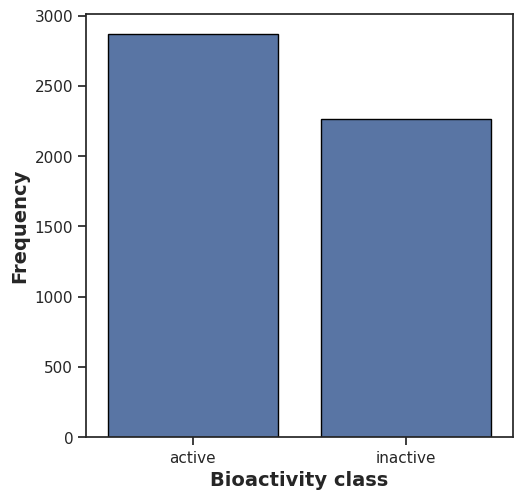

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

## Scatter plot of LogP VS MW

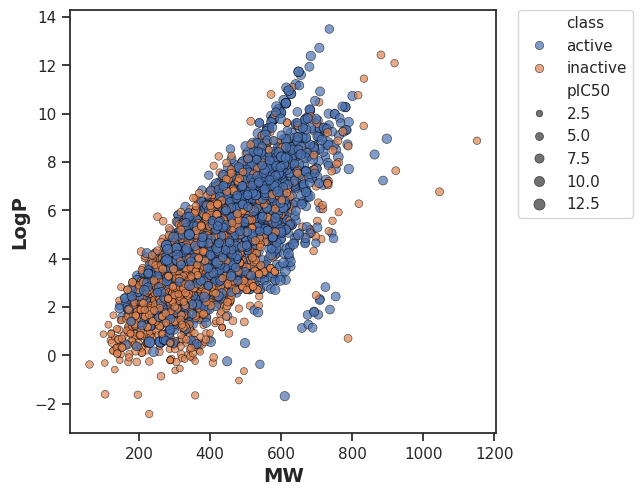

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

## Box Plots

### pIC50 value

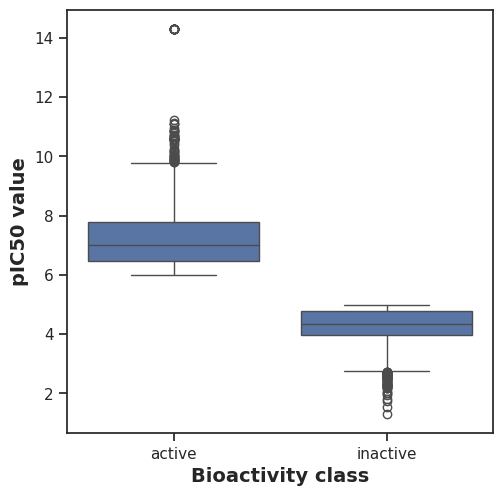

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

Statistical analysis | Mann-Whitney U Test

In [ ]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,NaN,NaN,0.05,Different distribution (reject H0)


### MW

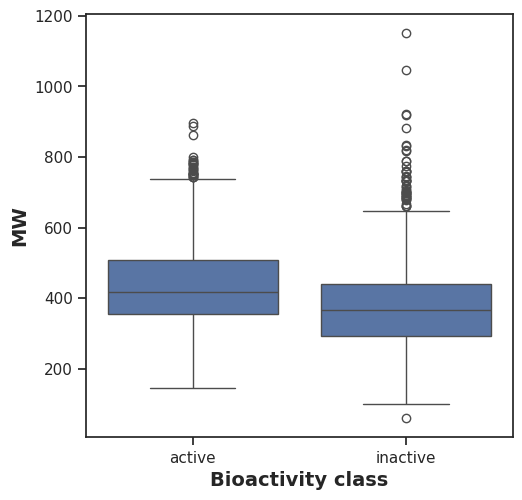

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,4214939.5,1.021037e-74,0.05,Different distribution (reject H0)


### LogP

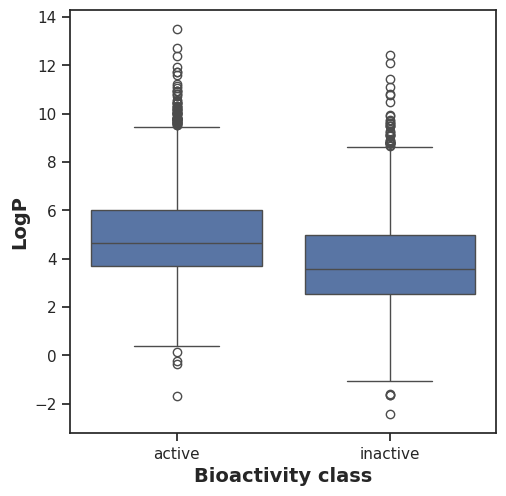

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,4326735.0,1.419315e-92,0.05,Different distribution (reject H0)


### NumHDonors

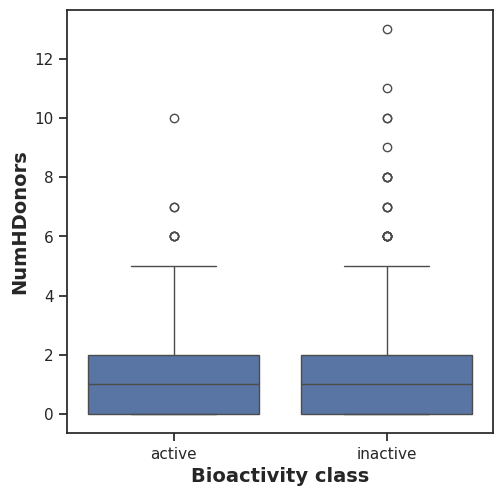

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,3682476.0,8.350286e-18,0.05,Different distribution (reject H0)


### NumHAcceptors

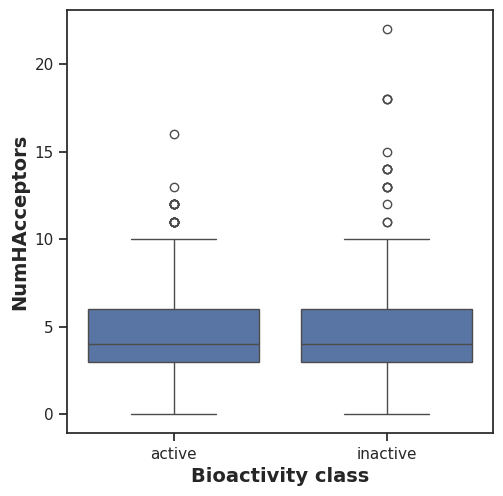

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,3497551.0,0.000002,0.05,Different distribution (reject H0)


In [ ]:
! zip -r results.zip . -i *.csv *.pdf

  adding: plot_ic50.pdf (deflated 35%)
  adding: mannwhitneyu_pIC50.csv (deflated 9%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: acetylcholinesterase_05_bioactivity_data_2class_pIC50.csv (deflated 75%)
  adding: plot_MW_vs_LogP.pdf (deflated 2%)
  adding: plot_MW.pdf (deflated 38%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 10%)
  adding: acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv (deflated 76%)
  adding: mannwhitneyu_LogP.csv (deflated 9%)
  adding: mannwhitneyu_MW.csv (deflated 9%)
  adding: acetylcholinesterase_03_bioactivity_data_curated.csv (deflated 82%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 10%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: plot_NumHAcceptors.pdf (deflated 39%)
  adding: plot_LogP.pdf (deflated 37%)
